## Olympic Sports and Medals, 1896-2014
Which countries and athletes have won the most medals at the Olympic games?

### Importing libraries & data

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [66]:
summer = pd.read_csv('data/summer.csv')

In [4]:
winter = pd.read_csv('data/winter.csv')

In [5]:
countries = pd.read_csv('data/dictionary.csv')

### Inspecting Datasets

In [6]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [67]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [8]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [9]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [10]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [11]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [12]:
# Listing all of the missing data in the 'countries' dataframe
countries[countries.isnull().any(axis = 1)].reset_index(drop=True)

,Country,Code,Population,GDP per Capita
0,American Samoa*,ASA,55538.0,NaN
1,Andorra,AND,70473.0,NaN
2,Aruba*,ARU,103889.0,NaN
3,Bermuda*,BER,65235.0,NaN
4,British Virgin Islands,IVB,30117.0,NaN
5,Cayman Islands*,CAY,59967.0,NaN
6,Cook Islands,COK,NaN,NaN
7,Cuba,CUB,11389562.0,NaN
8,Eritrea,ERI,NaN,NaN
9,Guam,GUM,169885.0,NaN


#I did a data exploration
#- The columns in summer and winter are similar, but the data is different. It contains (Year, City, Sport Discipline, Athlete Country, Gender Event, Medal)
#- Dictonary contains country information
#-I discovered a lot of missing data

### Proposed Questions

- ***Analysing all Summer editions data***
    - Can you find the __highest__ male / female __athletes__ of all time in the Summer editions?
    - Find the highest __athletes__ regarding to each __medal type__ in the Summer editions?

- ***Which are the most successful countries in both Summer and Winter editions?***
    - What are the __Top 10__ Countries by __total medals__?
    - __Split__ the total medals of Top 10 Countries into __Summer. Are there typical Summer Games Countries? 
    - __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 


-----------------------------

- ***Analysing all Summer editions data***
    - Can you find the __highest__ male / female __athletes__ of all time in the Summer editions?
    - Find the highest __athletes__ regarding to each __medal type__ in the Summer editions?

##### Q. Can you find the highest male / female athletes of all time in the Summer editions

In [13]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [14]:
# Modify the full name of the athletes in Winter and Summer editions
summer['Athlete'] = summer['Athlete'].str.split(', ').str[::-1].str.join(' ')
summer['Athlete'] = summer['Athlete'].str.title()
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [15]:
# Adding the countries column to our dataframe
summer = summer.merge(countries,left_on='Country',right_on='Code',how='left')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578


In [16]:
summer=summer[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
summer.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [17]:
# The highest male athlete of all Summer editions 
male_athlete = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0]
male_athlete

'Michael Phelps'

In [18]:
# His total number of medals
num_of_male_medals = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].values[0]
num_of_male_medals

22

In [19]:
# The highest female athlete of all Summer editions 
female_athlete = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0]
female_athlete

'Larisa Latynina'

In [20]:
# Her total number of medals
num_of_female_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0]
num_of_female_medals

18

In [ ]:
#Men won more medals than women

##### Q. Find the highest athletes regarding to each medal type in the Summer editions

In [21]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [22]:
# Let's discover what does 'Michael Phelps' have of medals  
summer[summer.Athlete == 'Michael Phelps']

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
25225,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,100M Butterfly,Gold,United States
25253,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Butterfly,Gold,United States
25258,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Freestyle,Bronze,United States
25265,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Individual Medley,Gold,United States
25277,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,400M Individual Medley,Gold,United States
25286,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X100M Freestyle Relay,Bronze,United States
25325,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X100M Medley Relay,Gold,United States
25361,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X200M Freestyle Relay,Gold,United States
27224,2008,Beijing,Aquatics,Swimming,Michael Phelps,USA,Men,100M Butterfly,Gold,United States
27252,2008,Beijing,Aquatics,Swimming,Michael Phelps,USA,Men,200M Butterfly,Gold,United States


In [23]:
top_medals = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
top_medals

,Athlete,Medal,Sport
17344,Michael Phelps,Gold,18
3517,Carl Lewis,Gold,9
16581,Mark Spitz,Gold,9
19224,Paavo Nurmi,Gold,9
14731,Larisa Latynina,Gold,9
...,...,...,...
9532,Harald Sandberg,Bronze,1
9531,Harald S.A. Julin,Silver,1
9529,Harald Oliver Faerstad,Silver,1
9528,Harald Norpoth,Silver,1


In [24]:
#The player who won the most medals of every kind
top_medals = top_medals.drop_duplicates(subset=['Medal'],keep='first')
top_medals.columns = [['Athlete','Medal','Count']]
top_medals

,Athlete,Medal,Count
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


In [78]:
top_10 = medals_country.sort_values(by='Gold',ascending=False)[:11]
top_10

Medal,Bronze,Gold,Silver
Country,,,
United States,1098.0,2235.0,1252.0
United Kingdom,553.0,546.0,621.0
Italy,404.0,476.0,416.0
Germany,475.0,452.0,378.0
Hungary,351.0,412.0,316.0
France,497.0,408.0,491.0
Sweden,328.0,349.0,367.0
Australia,472.0,312.0,405.0
China,221.0,290.0,296.0


-------------

##### Q. Which are the most successful countries in both Summerr editions?
- What are the __Top 10__ Countries by __total medals__?
- __Split__ the total medals of Top 10 Countries into __Summer and winter. Are there typical Summer and winter Games Countries? 
- __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

#### 1] Data Merging

In [31]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [32]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [33]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [34]:
#  merge the two dataframes
olympics = pd.concat([summer, winter], keys = ["Summer", "Winter"], names = ["Edition"]).reset_index().drop(columns = "level_1")
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",NaN,Women,Slopestyle,Bronze,GBR
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",NaN,Women,Slopestyle,Gold,USA
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",NaN,Women,Snowboard Cross,Silver,CAN
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",NaN,Women,Snowboard Cross,Gold,CZE


#### 2] Data Cleaning

In [36]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",NaN,Women,Slopestyle,Bronze,GBR
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",NaN,Women,Slopestyle,Gold,USA
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",NaN,Women,Snowboard Cross,Silver,CAN
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",NaN,Women,Snowboard Cross,Gold,CZE


##### appropriate Column Headers to Country Codes and full Country Names

In [77]:
olympics.rename(columns = {"Country_x":"Code", "Country_y": "Country"}, inplace = True)

##### For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values!

In [38]:
# Finding the missing data in the new dataframe
olympics.loc[olympics.Country.isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,Edwin Flack,ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,George Stuart Robertson,ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,John Boland,ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,Friedrich Traun,ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,Dionysios Kasdaglis,ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31077,Summer,2012,London,Weightlifting,Weightlifting,Razvan Constantin Martin,ROU,Men,69KG,Bronze,NaN
31079,Summer,2012,London,Weightlifting,Weightlifting,Roxana Daniela Cocos,ROU,Women,69KG,Silver,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN


In [39]:
# List all of the old countries' codes
olympics.loc[olympics.Country.isnull()].Code.value_counts()

URS    2049
GDR     825
ROU     640
FRG     490
YUG     435
TCH     329
EUA     260
EUN     223
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [40]:
# Get all of the indicies of the old countries
old_indices = olympics.loc[olympics.Country.isnull()].Code.value_counts().index
old_indices

Index(['URS', 'GDR', 'ROU', 'FRG', 'YUG', 'TCH', 'EUA', 'EUN', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [41]:
# Create a mapper to match the old countries' codes with their corresponding names
mapper = pd.Series(index=old_indices, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
YUG                      Czechoslovakia
TCH                          Yugoslavia
EUA                        Unified Team
EUN             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [42]:
#  all the missing data indicies to map them to countries
missing_indices = olympics.loc[olympics.Country.isnull()].index
missing_indices

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            30883, 30899, 30900, 30901, 30910, 31072, 31077, 31079, 31091,
            31110],
           dtype='int64', length=5423)

In [43]:
# I need to map the names
olympics.loc[missing_indices, "Code"].map(mapper)

132      Mixed teams
133      Mixed teams
134      Mixed teams
135      Mixed teams
136      Mixed teams
            ...     
31072            NaN
31077        Romania
31079        Romania
31091            NaN
31110            NaN
Name: Code, Length: 5423, dtype: object

In [44]:
# Filling the missing data with the new names
olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)

In [45]:
olympics.loc[missing_indices]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,Edwin Flack,ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,George Stuart Robertson,ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,John Boland,ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,Friedrich Traun,ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,Dionysios Kasdaglis,ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31077,Summer,2012,London,Weightlifting,Weightlifting,Razvan Constantin Martin,ROU,Men,69KG,Bronze,Romania
31079,Summer,2012,London,Weightlifting,Weightlifting,Roxana Daniela Cocos,ROU,Women,69KG,Silver,Romania
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN


##### Remove rows from olympics where the Country code is unknown

In [46]:
# Double-check for any missing data
olympics[olympics.Code.isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,Besik Kudukhov,NaN,Men,Wf 60 KG,Silver,NaN
31165,Winter,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",NaN,Men,Military Patrol,Bronze,FRA
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",NaN,Women,Slopestyle,Bronze,GBR
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",NaN,Women,Slopestyle,Gold,USA
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",NaN,Women,Snowboard Cross,Silver,CAN
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",NaN,Women,Snowboard Cross,Gold,CZE


In [47]:
# Drop these missing records
olympics.dropna(subset = ["Code"], inplace = True)

In [48]:
# Reseting indicies to get rid of the deleted records
olympics.reset_index(drop = True, inplace = True)

In [49]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31161 entries, 0 to 31160
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     31161 non-null  object
 1   Year        31161 non-null  int64 
 2   City        31161 non-null  object
 3   Sport       31161 non-null  object
 4   Discipline  31161 non-null  object
 5   Athlete     31161 non-null  object
 6   Code        31161 non-null  object
 7   Gender      31161 non-null  object
 8   Event       31161 non-null  object
 9   Medal       31161 non-null  object
 10  Country     31161 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.6+ MB


#### 3] Data Analysis & Visualization (EDA)

##### Q. What are the Top 10 Countries by total medals?

In [55]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
31156,Summer,2012,London,Wrestling,Wrestling Freestyle,Damian Janikowski,POL,Men,Wg 84 KG,Bronze,Poland
31157,Summer,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza Rezaei,IRI,Men,Wg 96 KG,Gold,Iran
31158,Summer,2012,London,Wrestling,Wrestling Freestyle,Rustam Totrov,RUS,Men,Wg 96 KG,Silver,Russia
31159,Summer,2012,London,Wrestling,Wrestling Freestyle,Artur Aleksanyan,ARM,Men,Wg 96 KG,Bronze,Armenia


In [56]:
olympics.Country.value_counts()

United States     4585
Soviet Union      2049
United Kingdom    1720
France            1396
Germany           1305
                  ... 
Cote d'Ivoire        1
Bermuda*             1
Niger                1
Iraq                 1
Gabon                1
Name: Country, Length: 144, dtype: int64

In [57]:
top_10 = olympics.Country.value_counts().nlargest(10)
top_10

United States     4585
Soviet Union      2049
United Kingdom    1720
France            1396
Germany           1305
Italy             1296
Australia         1189
Hungary           1079
Sweden            1044
Netherlands        851
Name: Country, dtype: int64

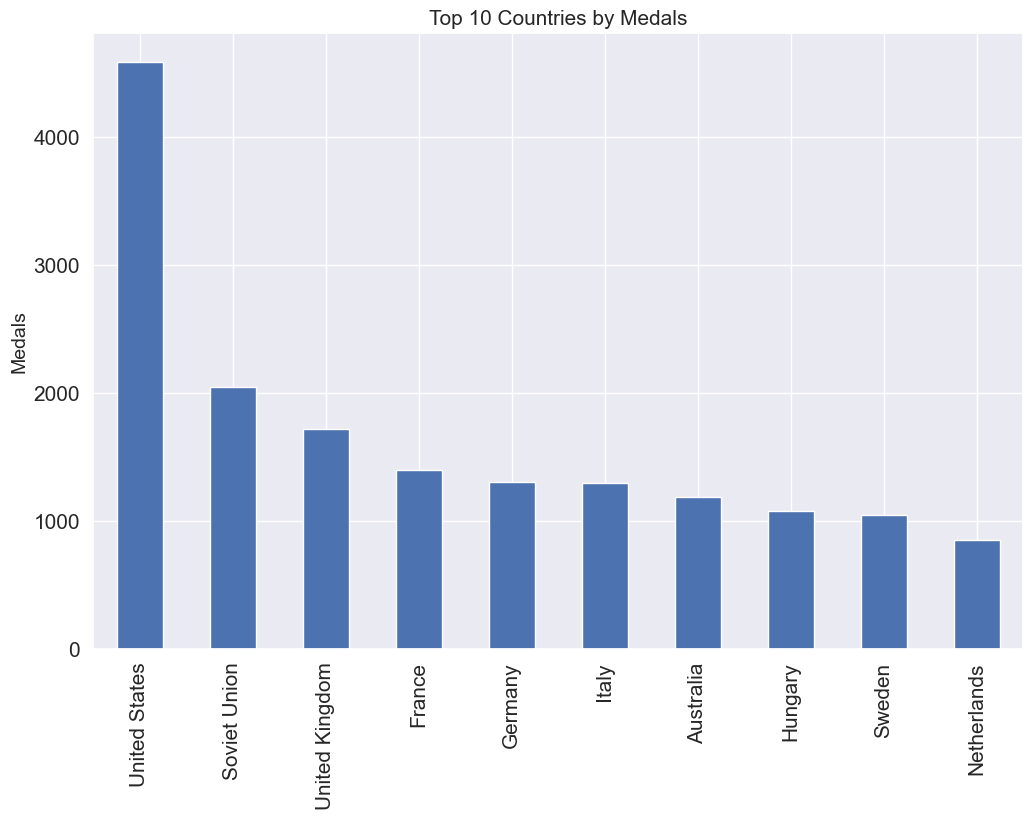

In [58]:
top_10.plot(kind = "bar", fontsize = 15, figsize=(12,8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

##### Q. Split the total medals of Top 10 Countries into Summer. Are there typical Summer Games Countries?

In [59]:
# Gathering the top10 data
olympics_10 = olympics[olympics.Country.isin(top_10.index)]
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,Francis Lane,USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,Thomas Burke,USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
31135,Summer,2012,London,Wrestling,Wrestling Freestyle,Johan Euren,SWE,Men,Wg 120 KG,Bronze,Sweden
31139,Summer,2012,London,Wrestling,Wrestling Freestyle,Peter Modos,HUN,Men,Wg 55 KG,Bronze,Hungary
31146,Summer,2012,London,Wrestling,Wrestling Freestyle,Tamas Lorincz,HUN,Men,Wg 66 KG,Silver,Hungary
31147,Summer,2012,London,Wrestling,Wrestling Freestyle,Steeve Guenot,FRA,Men,Wg 66 KG,Bronze,France


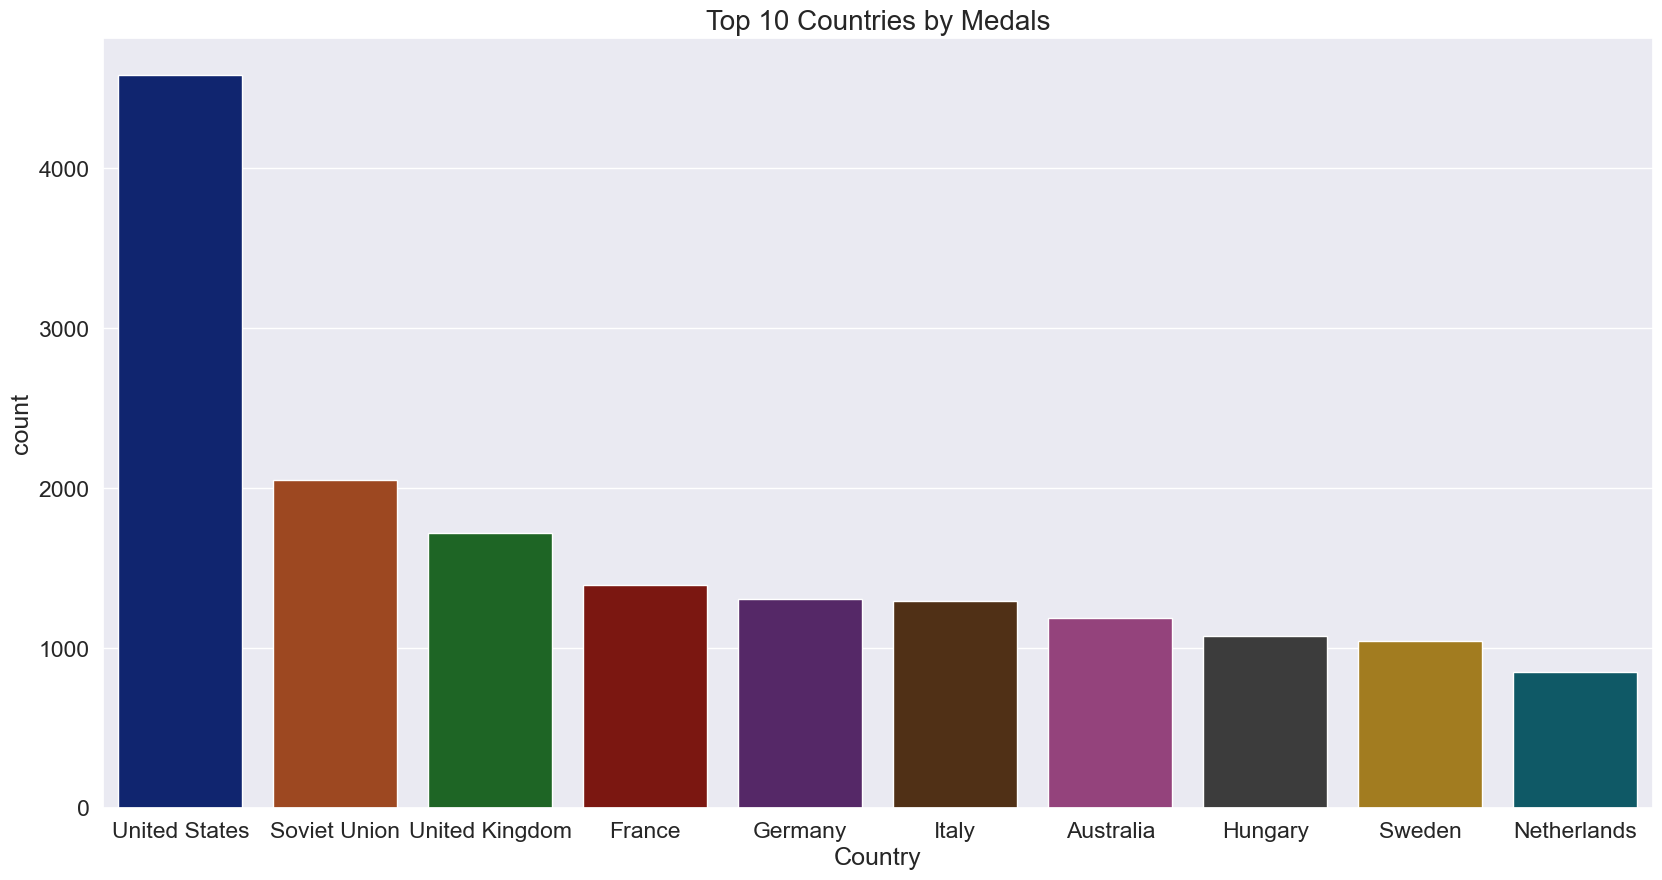

In [60]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

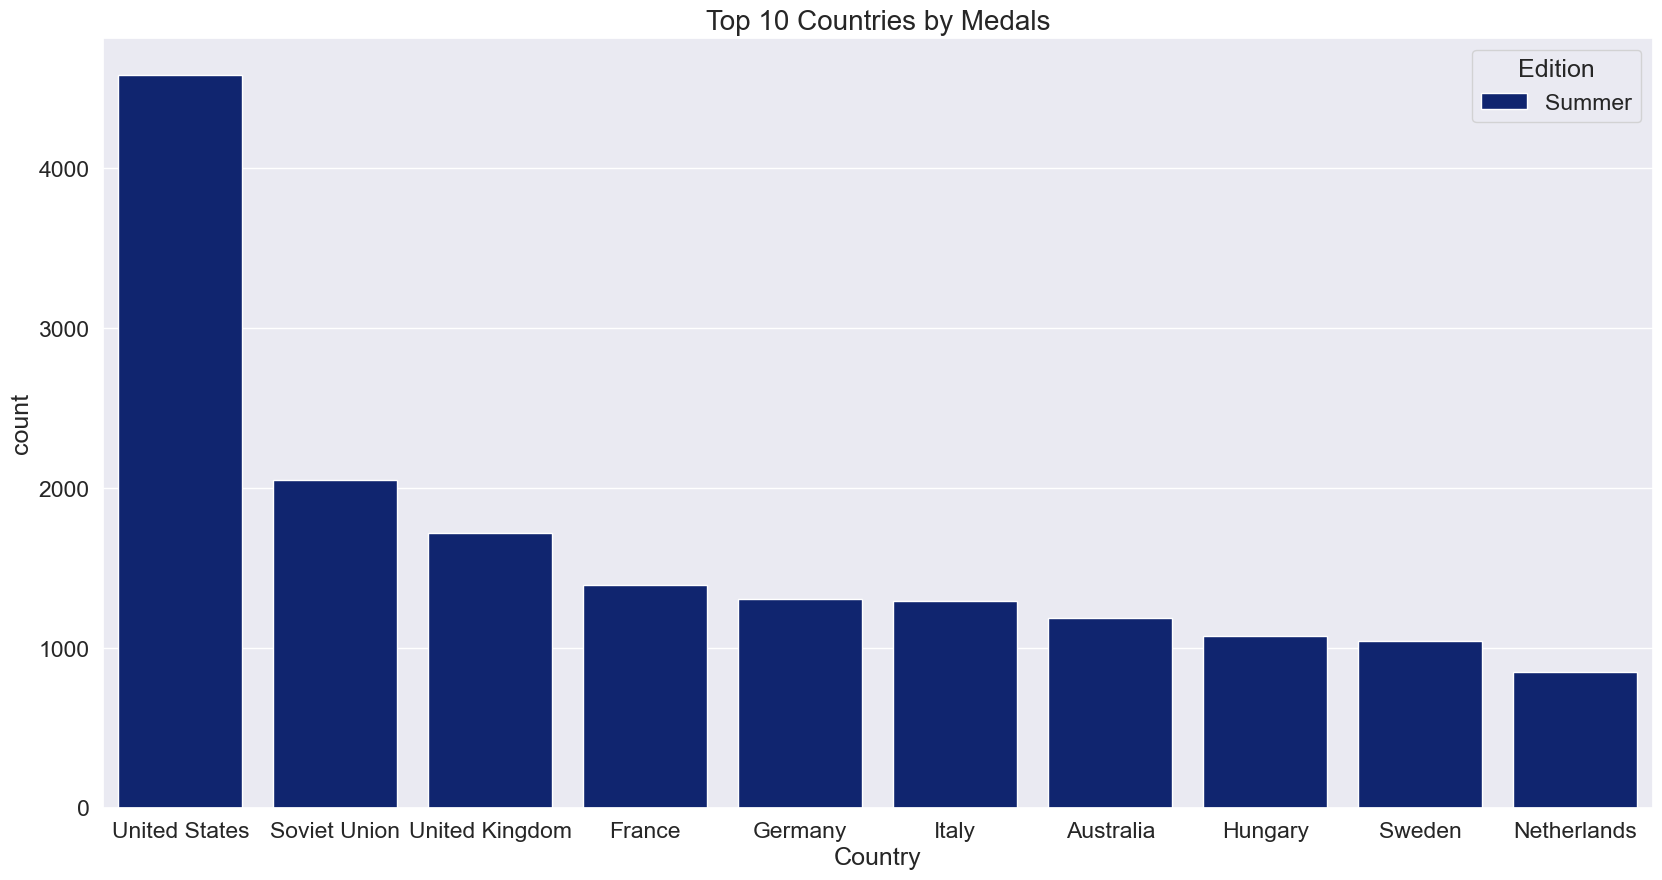

In [61]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", hue = "Edition", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

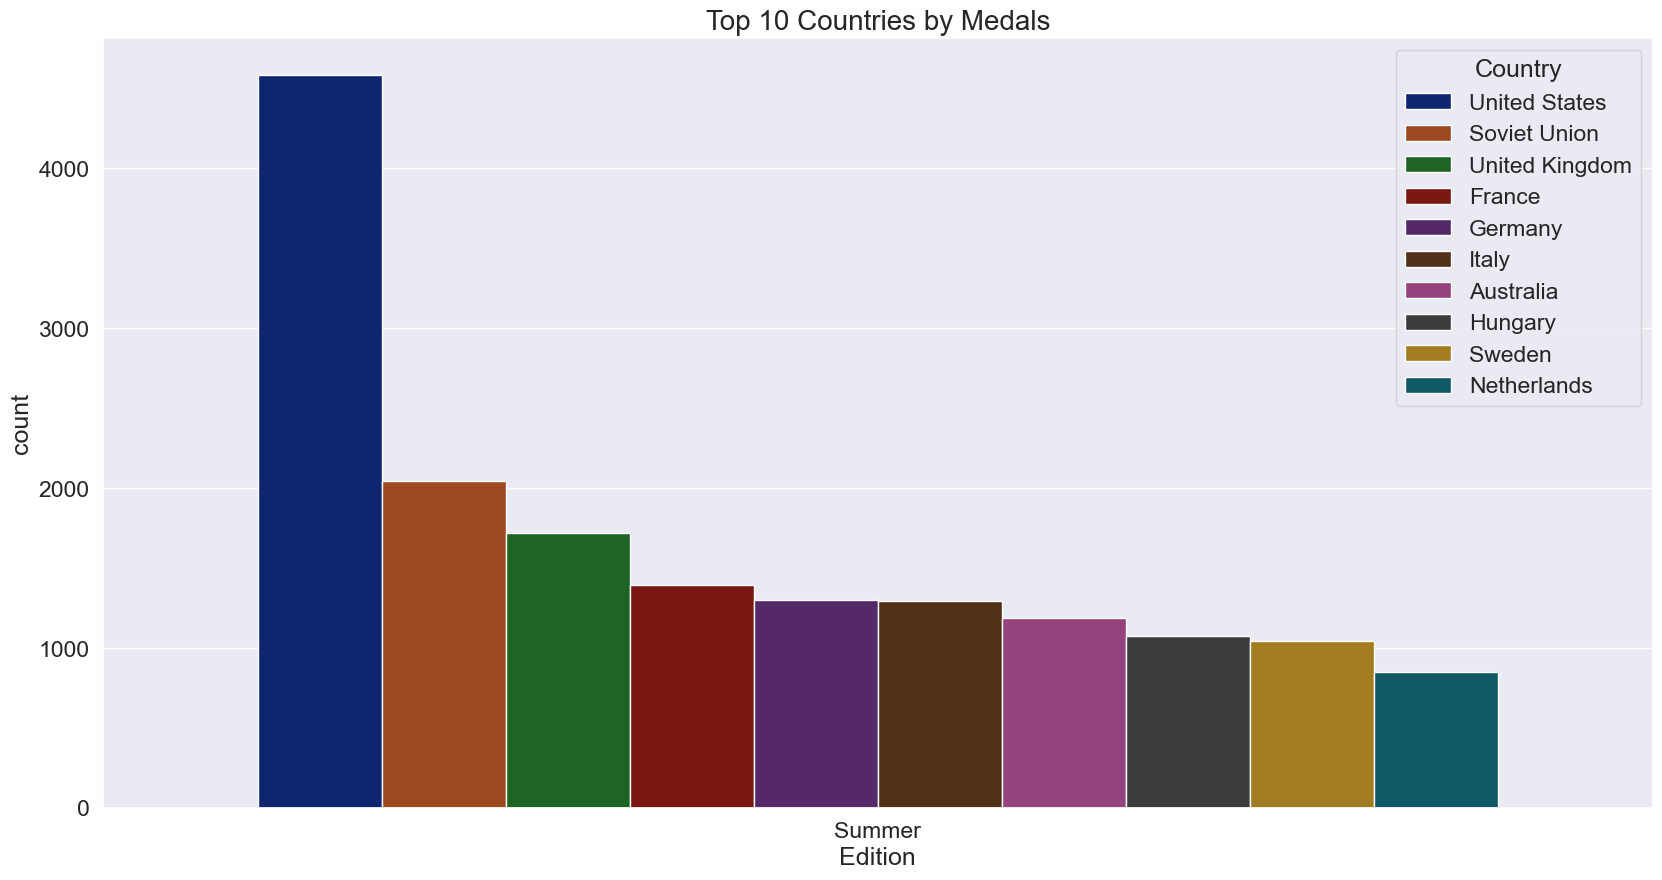

In [62]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Edition", hue = "Country", hue_order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

##### Q. Split the total medals of Top 10 Countries into Gold, Silver, Bronze

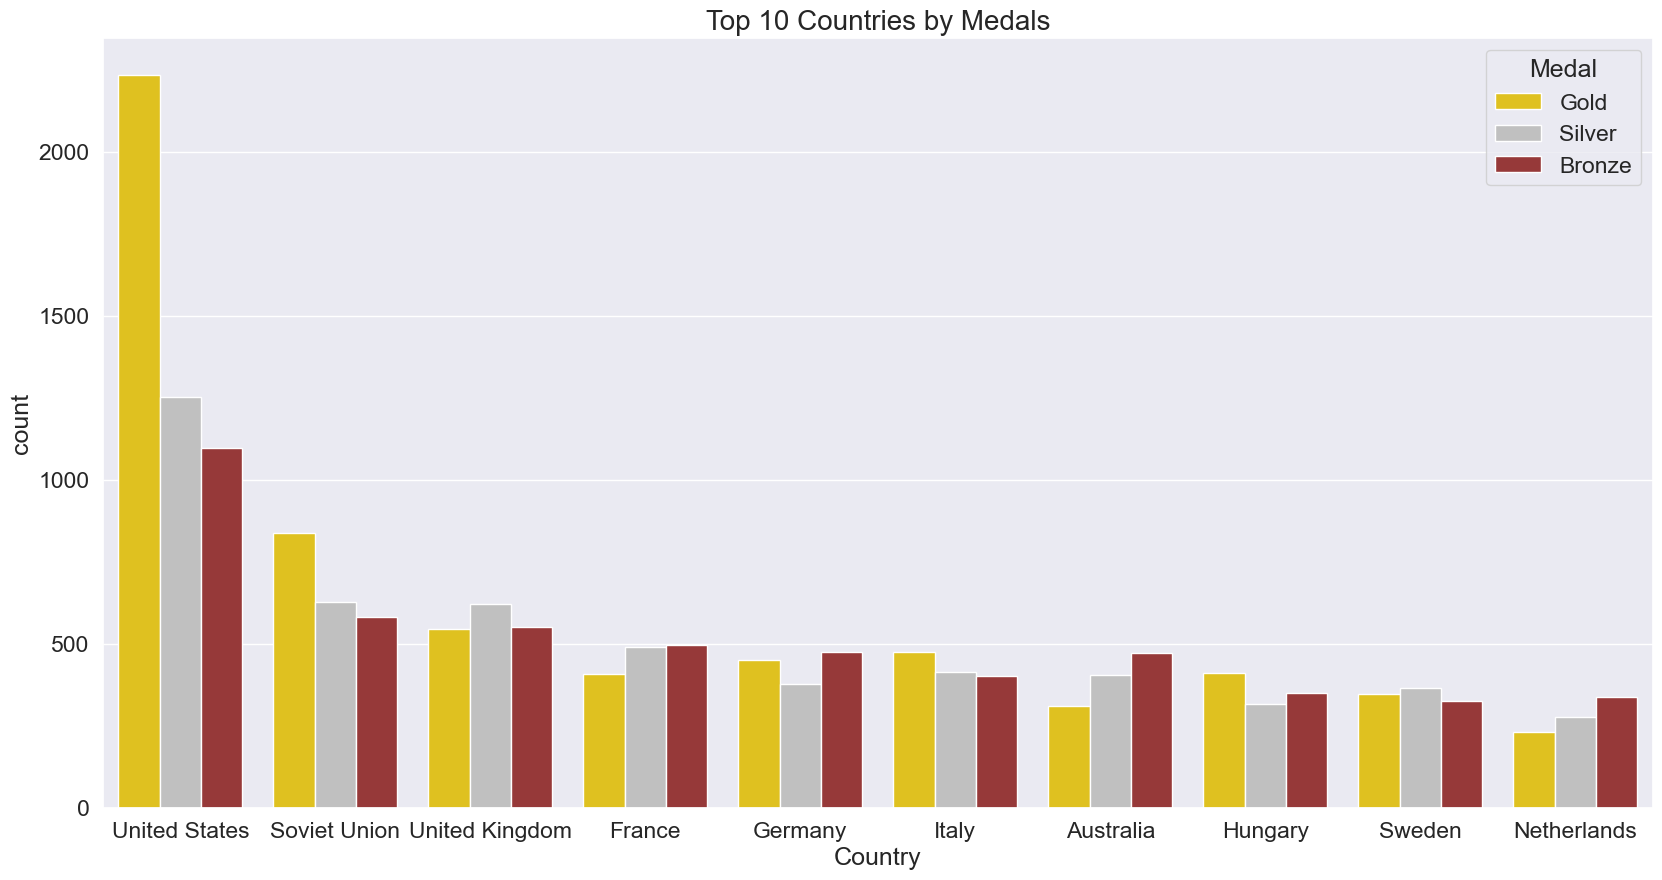

In [63]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", hue = "Medal", order = top_10.index,
              hue_order = ["Gold", "Silver", "Bronze"], palette = ["gold", "silver", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

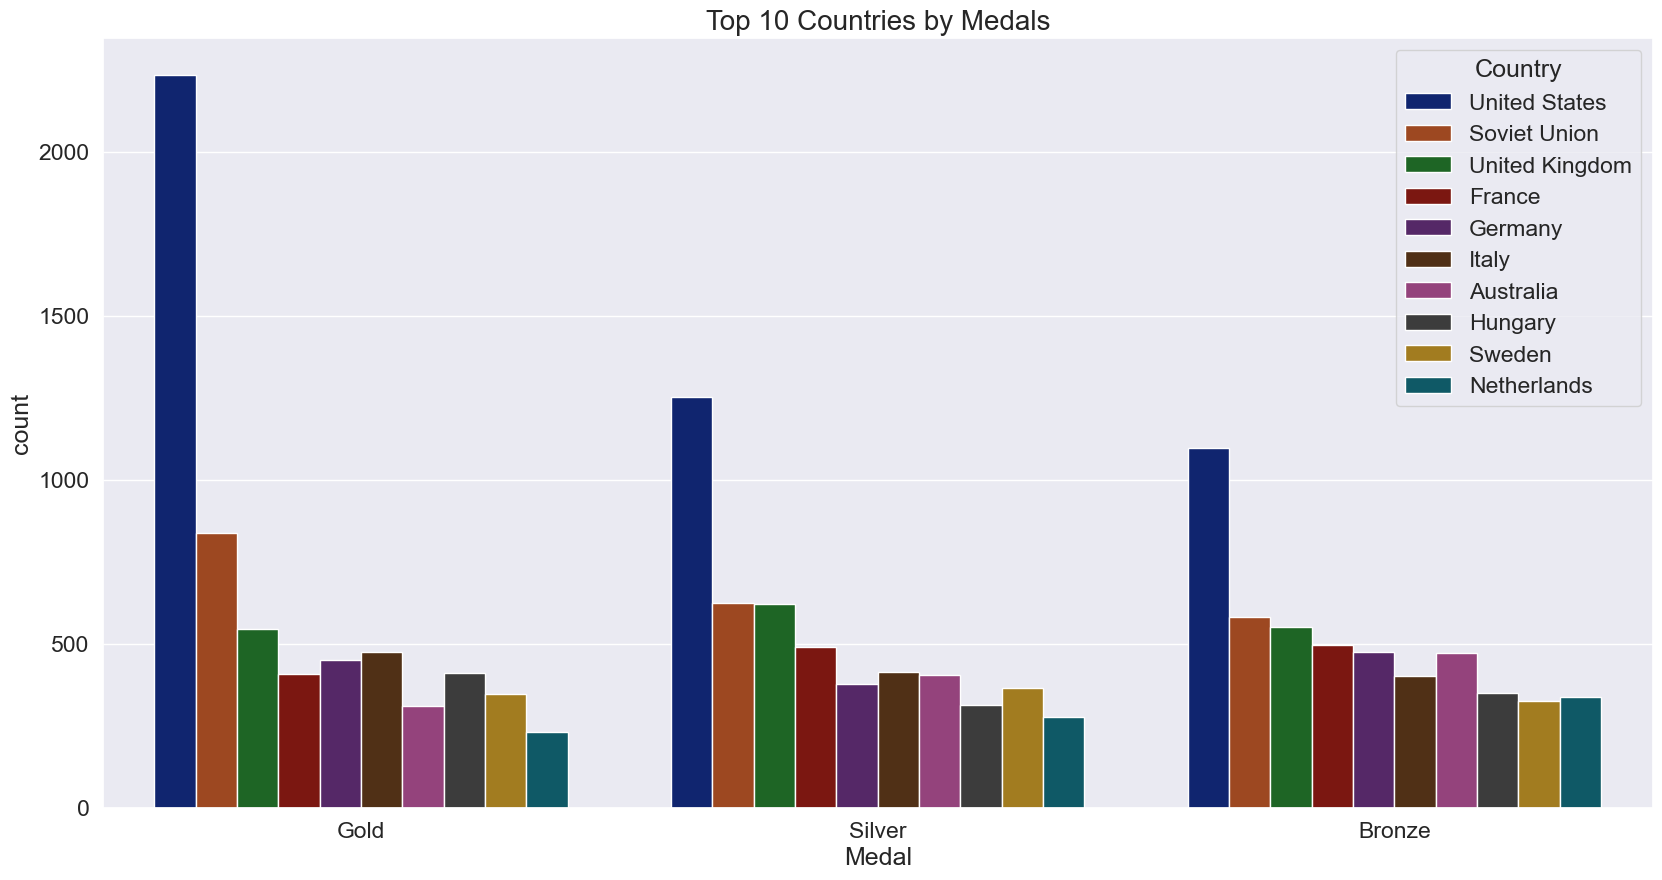

In [64]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Medal", hue = "Country", 
              order = ["Gold", "Silver", "Bronze"], hue_order= top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()